In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BTC-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 49s 531ms/step - loss: 0.0014 - val_loss: 0.0115
Epoch 2/100
29/29 [==============================] - 9s 304ms/step - loss: 2.0343e-04 - val_loss: 0.0082
Epoch 3/100
29/29 [==============================] - 9s 315ms/step - loss: 1.6289e-04 - val_loss: 0.0079
Epoch 4/100
29/29 [==============================] - 9s 322ms/step - loss: 1.4744e-04 - val_loss: 0.0093
Epoch 5/100
29/29 [==============================] - 10s 338ms/step - loss: 1.4310e-04 - val_loss: 0.0115
Epoch 6/100
29/29 [==============================] - 11s 378ms/step - loss: 1.1772e-04 - val_loss: 0.0139
Epoch 7/100
29/29 [==============================] - 10s 339ms/step - loss: 1.0477e-04 - val_loss: 0.0172
Epoch 8/100
29/29 [==============================] - 12s 396ms/step - loss: 9.8014e-05 - val_loss: 0.0164
Epoch 9/100
29/29 [==============================] - 11s 381ms/step - loss: 9.5340e-05 - val_loss: 0.0122
Epoch 10/100
29/29 [==============================] -

29/29 [==============================] - 8s 263ms/step - loss: 2.2903e-05 - val_loss: 0.0016
Epoch 78/100
29/29 [==============================] - 7s 243ms/step - loss: 2.5870e-05 - val_loss: 0.0031
Epoch 79/100
29/29 [==============================] - 7s 247ms/step - loss: 2.3820e-05 - val_loss: 0.0026
Epoch 80/100
29/29 [==============================] - 7s 245ms/step - loss: 2.3726e-05 - val_loss: 0.0016
Epoch 81/100
29/29 [==============================] - 6s 224ms/step - loss: 2.2322e-05 - val_loss: 0.0019
Epoch 82/100
29/29 [==============================] - 7s 238ms/step - loss: 2.3211e-05 - val_loss: 0.0027
Epoch 83/100
29/29 [==============================] - 7s 229ms/step - loss: 2.1622e-05 - val_loss: 0.0026
Epoch 84/100
29/29 [==============================] - 6s 211ms/step - loss: 2.3755e-05 - val_loss: 0.0036
Epoch 85/100
29/29 [==============================] - 6s 191ms/step - loss: 2.5154e-05 - val_loss: 0.0024
Epoch 86/100
29/29 [==============================] - 6s 22

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

17/17 [==============================] - 1s 49ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.042
RMSE on validation set: 0.022
MAPE on test set: 0.044
MAPE on validation set: 0.031
The explained variance score (EVS) on test set: 0.980
The explained variance score (EVS) on validate set: 0.979


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.32708241 0.3196377  0.29952961 0.2969212  0.30352714 0.32625408
 0.35643099 0.36457095 0.35907873 0.36912237 0.40430839 0.39751124
 0.41343077 0.40940281 0.41546584 0.40257973 0.41781277 0.40533757
 0.40535867 0.41277272 0.40009342 0.40199644 0.41802747 0.4133549
 0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913

7 day output [[0.33398786]]
8 day input [0.35907873 0.36912237 0.40430839 0.39751124 0.41343077 0.40940281
 0.41546584 0.40257973 0.41781277 0.40533757 0.40535867 0.41277272
 0.40009342 0.40199644 0.41802747 0.4133549  0.41995722 0.41895632
 0.41581445 0.40974388 0.41535119 0.41549801 0.41351187 0.41175666
 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885 0.44845727
 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348  0.42506483
 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324 0.41742138
 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503 0.41421566
 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081 0.41960841
 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377 0.39481345
 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768 0.39638717
 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676 0.39024487
 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994 0.40127714
 0.3953461  0.40172131 0.39913243 0.39978444 0.37961832 0.40156095
 0.38831266 0.39071987

15 day output [[0.31124344]]
16 day input [0.41781277 0.40533757 0.40535867 0.41277272 0.40009342 0.40199644
 0.41802747 0.4133549  0.41995722 0.41895632 0.41581445 0.40974388
 0.41535119 0.41549801 0.41351187 0.41175666 0.41208217 0.41779909
 0.43738589 0.44602351 0.44459885 0.44845727 0.44974283 0.44726166
 0.44721506 0.43430028 0.4484348  0.42506483 0.41650714 0.40212672
 0.41014869 0.4067933  0.40581324 0.41742138 0.41912943 0.43472679
 0.43274537 0.43138352 0.43168503 0.41421566 0.42295553 0.42778975
 0.42543627 0.43562601 0.42628081 0.41960841 0.40832009 0.40779333
 0.40724398 0.39802928 0.39512377 0.39481345 0.3969883  0.40087701
 0.39856144 0.40393552 0.39552768 0.39638717 0.39994054 0.39436453
 0.39581064 0.40136719 0.38814676 0.39024487 0.39385206 0.39606404
 0.41412779 0.40908597 0.40843994 0.40127714 0.3953461  0.40172131
 0.39913243 0.39978444 0.37961832 0.40156095 0.38831266 0.39071987
 0.39030672 0.38097081 0.38229043 0.38173147 0.38197229 0.37018912
 0.36085796 0.354556

24 day output [[0.29401422]]
25 day input [0.41895632 0.41581445 0.40974388 0.41535119 0.41549801 0.41351187
 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885
 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348
 0.42506483 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324
 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503
 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081
 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377
 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768
 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676
 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994
 0.40127714 0.3953461  0.40172131 0.39913243 0.39978444 0.37961832
 0.40156095 0.38831266 0.39071987 0.39030672 0.38097081 0.38229043
 0.38173147 0.38197229 0.37018912 0.36085796 0.35455611 0.35028902
 0.34710482 0.34416789 0.34102356 0.33758497 0.33398786 0.33042979
 0.3270615  0.3239494

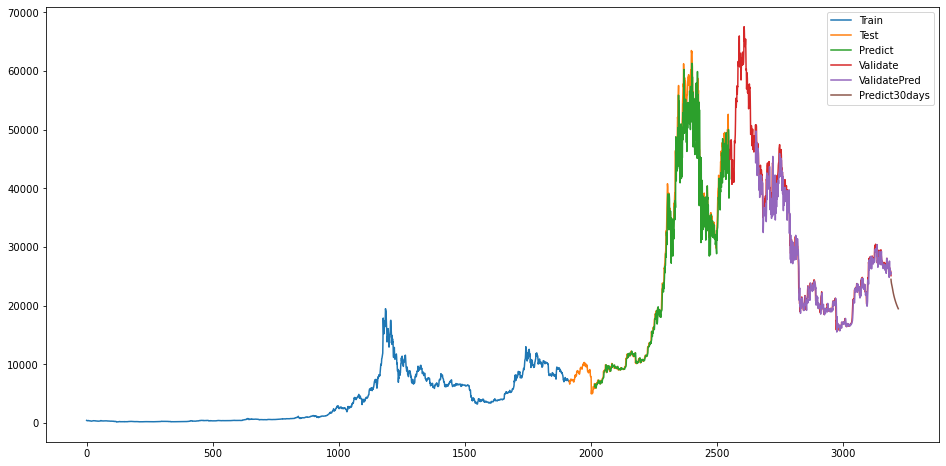

In [14]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()